# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [17]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ingest Data  

In [18]:
df = pd.read_excel("World military power.xlsx",header = 1)
df 

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [19]:
df.duplicated().any().any()

False

# EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [21]:

df_object = df.select_dtypes(include ="object")
df_object.shape

(138, 40)

In [22]:
 #df_columns_value = [i for i in df_object.columns if "value" isin.i] devam edilecek elksik kaldı.

In [23]:
df_numeric = df.select_dtypes(include ="number")
df_numeric.shape

(138, 20)

## Implement basic steps to see how is your data looks like

In [24]:
df.shape

(138, 60)

## Convert multi index columns to one level

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [26]:
df_obj_num = ["defense spending budget value",'Oil Consumption value','Proven Oil Reserves value','Available Manpower value',
          'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value',"Oil Production value",     
           'Total Waterway Coverage value',"External Debt value"]

In [27]:
for i in df_obj_num:
    df[i].replace(",","",regex=True,inplace=True)

In [28]:
df[df_obj_num] = df[df_obj_num].astype("float64")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [30]:
df_object = df.select_dtypes(include ="object")
df_object.shape

(138, 30)

In [31]:
df_numeric = df.select_dtypes(include ="number")
df_numeric.shape


(138, 30)

In [32]:
df_numeric["Military Strength"] = df["Military Strength"]

In [33]:
df_numeric.shape # with country names

(138, 31)

## Detect and drop duplicated columns

In [34]:
df_numeric.duplicated().sum()

0

## Check for missing values 

In [35]:
df_numeric.isnull().sum()

Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value                        0
Oil Production value              

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [36]:
miss=[]
for i in df_numeric.columns:
    if  df_numeric[i].isnull().sum() != 0 :
      miss.append(i)
miss    

['Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage value',
 'Total Border Coverage value']

In [37]:
#(df_numeric["Military Strength"])& (df_numeric['Navy Fleet Strengths value']=="Nan")
df_numeric[["Military Strength",'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage value',
 'Total Border Coverage value']]

,Military Strength,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Total Coastline Coverage value,Total Border Coverage value
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,5987.0
1,Albania,38.0,0.0,0.0,0.0,0.0,362.0,691.0
2,Algeria,201.0,0.0,6.0,0.0,5.0,998.0,6734.0
3,Angola,57.0,0.0,0.0,0.0,0.0,1600.0,5369.0
4,Argentina,49.0,0.0,2.0,4.0,0.0,4989.0,11968.0
5,Armenia,0.0,NaN,NaN,NaN,NaN,NaN,1570.0
6,Australia,48.0,2.0,6.0,2.0,8.0,25760.0,NaN
7,Austria,0.0,NaN,NaN,NaN,NaN,NaN,2524.0
8,Azerbaijan,31.0,0.0,4.0,0.0,1.0,713.0,2468.0
9,Bahrain,39.0,0.0,0.0,0.0,1.0,161.0,NaN


In [38]:
df_numeric[df_numeric['Destroyer Fleet Strength value'].isnull()== True] # Denize kıyısı olmadığı için deniz kuvvetleri sıfır olarak değerlendirildi.


,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Military Strength
5,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,29743.0,NaN,0.0,1570.0,Armenia
7,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3.380000e+09,6.308000e+11,52.0,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,83871.0,NaN,0.0,2524.0,Austria
11,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,NaN,NaN,NaN,NaN,6.237028e+08,3.992000e+10,65.0,32000.0,190000.0,1.980000e+08,4982905.0,9527543.0,207600.0,NaN,2500.0,3599.0,Belarus
13,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.512000e+07,2.671000e+09,2.0,0.0,2000.0,0.000000e+00,176808.0,766397.0,38394.0,NaN,0.0,1136.0,Bhutan
16,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN,4.500000e+08,2.187000e+09,74.0,0.0,16500.0,0.000000e+00,962617.0,2249104.0,581730.0,NaN,0.0,4347.0,Botswana
19,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.300000e+08,3.056000e+09,23.0,0.0,10500.0,0.000000e+00,7800000.0,19742715.0,274200.0,NaN,0.0,3611.0,Burkina Faso
23,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2.000000e+07,7.799000e+08,39.0,0.0,4500.0,0.000000e+00,2348581.0,5745062.0,622984.0,NaN,2800.0,5920.0,Central African Republic
24,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,372.0,10.0,51.0,10.0,NaN,NaN,NaN,NaN,NaN,2.000000e+08,1.724000e+09,59.0,128000.0,100000.0,1.500000e+09,6030834.0,15833116.0,1284000.0,NaN,0.0,6406.0,Chad
30,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,682.0,86.0,85.0,0.0,NaN,NaN,NaN,NaN,NaN,2.969000e+09,2.052000e+11,128.0,2000.0,200000.0,1.500000e+07,5011174.0,10686269.0,78867.0,NaN,664.0,2046.0,Czechia
38,0.8581,86.0,24.0,0.0,9.0,20.0,33.0,8.0,400.0,114.0,67.0,650.0,183.0,NaN,NaN,NaN,NaN,NaN,3.500000e+08,2.605000e+10,57.0,0.0,55000.0,4.280000e+05,41143474.0,108386391.0,1104300.0,NaN,104300.0,5925.0,Ethiopia


In [39]:
df_numeric.fillna(value = 0, inplace = True)


In [40]:
df_numeric.isnull().sum()

Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

## Fix the dtypes

In [41]:
df_numeric.head(9)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Military Strength
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,Argentina
5,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,29743.0,0.0,0.0,1570.0,Armenia
6,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,2.630000e+10,1.714000e+12,480.0,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,7741220.0,25760.0,2000.0,0.0,Australia
7,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.380000e+09,6.308000e+11,52.0,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,83871.0,0.0,0.0,2524.0,Austria
8,0.9463,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2.805000e+09,1.741000e+10,37.0,789300.0,180000.0,7.000000e+09,5042346.0,10046516.0,86600.0,713.0,0.0,2468.0,Azerbaijan


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [42]:
df_numeric.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

In [43]:
df_numeric.drop(['Total Square Land Area value', 'Total Coastline Coverage value',
       'Total Waterway Coverage value', 'Total Border Coverage value'], axis=1, inplace = True)

In [44]:
df_numeric.shape

(138, 27)

## Visualy inspect the some features

<AxesSubplot:>

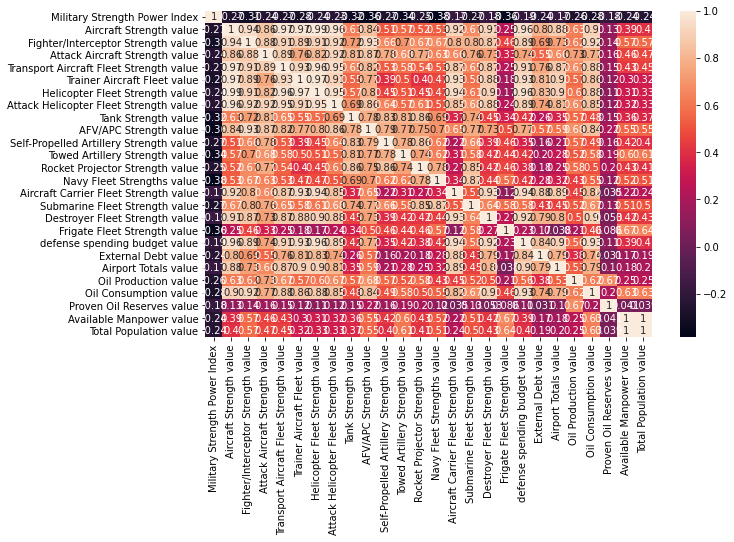

In [45]:
sns.heatmap(df_numeric.corr(),annot =True)

## Decriptive statistics

In [46]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


# Data Preprocessing

In [47]:
df_numeric["Military Strength Power Index"].sort_values() # target label olarak değerlendirdik.

130     0.0606
101     0.0681
26      0.0691
49      0.0953
57      0.1501
110     0.1509
40      0.1702
129     0.1717
35      0.1872
17      0.1988
124     0.2098
55      0.2111
43      0.2186
51      0.2191
91      0.2364
50      0.2544
102     0.3034
54      0.3111
6       0.3225
112     0.3388
96      0.3397
134     0.3559
122     0.3571
22      0.3712
87      0.3718
119     0.4008
127     0.4457
2       0.4659
109     0.4985
117     0.5259
89      0.5277
116     0.5304
45      0.5311
30      0.5531
79      0.5691
82      0.5919
27      0.6045
73      0.6065
100     0.6177
94      0.6219
133     0.6449
86      0.6485
4       0.6521
70      0.6546
128     0.7034
10      0.7066
25      0.7668
95      0.7852
32      0.7878
52      0.7911
105     0.7966
132     0.8086
11      0.8179
48      0.8215
118     0.8241
3       0.8379
77      0.8408
106     0.8466
39      0.8498
38      0.8581
97      0.8612
18      0.8916
59      0.9098
8       0.9463
103     0.9479
7       0.9568
14      0.

In [48]:
df_numeric.tail(14)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Military Strength
124,0.2098,1055.0,206.0,0.0,80.0,276.0,497.0,100.0,2622.0,8777.0,1278.0,1260.0,438.0,149.0,0.0,12.0,0.0,16.0,1.900000e+10,4.524000e+11,98.0,245000.0,845000.0,3.885000e+08,41847478.0,81257239.0,Turkey
125,1.3292,72.0,24.0,20.0,3.0,0.0,25.0,10.0,712.0,2000.0,68.0,269.0,116.0,4.0,0.0,0.0,0.0,0.0,2.000000e+08,5.394000e+08,26.0,230880.0,150000.0,6.000000e+08,2797493.0,5411012.0,Turkmenistan
126,1.6176,48.0,10.0,0.0,2.0,10.0,26.0,5.0,371.0,1081.0,6.0,53.0,26.0,8.0,0.0,0.0,0.0,0.0,9.350000e+08,1.080000e+10,47.0,0.0,17500.0,2.500000e+09,14707350.0,40853749.0,Uganda
127,0.4457,297.0,48.0,25.0,32.0,76.0,121.0,34.0,2026.0,10135.0,738.0,2040.0,430.0,25.0,0.0,0.0,0.0,1.0,5.400000e+09,1.300000e+11,187.0,29650.0,325000.0,3.950000e+08,22195911.0,43952299.0,Ukraine
128,0.7034,538.0,98.0,20.0,40.0,145.0,229.0,30.0,434.0,8691.0,183.0,76.0,72.0,75.0,0.0,0.0,0.0,0.0,2.275500e+10,2.376000e+11,43.0,3174000.0,575000.0,9.780000e+10,5820789.0,9701315.0,United Arab Emirates
129,0.1717,733.0,133.0,15.0,44.0,241.0,312.0,49.0,227.0,5000.0,89.0,126.0,35.0,88.0,2.0,10.0,6.0,13.0,5.510000e+10,8.126000e+12,460.0,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,United Kingdom
130,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,1465.0,2740.0,1366.0,490.0,20.0,66.0,91.0,0.0,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,United States
131,1.8909,50.0,0.0,7.0,9.0,16.0,13.0,0.0,78.0,463.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,1.0,4.950000e+09,2.837000e+10,133.0,0.0,55600.0,0.000000e+00,1549878.0,3369299.0,Uruguay
132,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,1215.0,137.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,9.750000e+08,1.690000e+10,53.0,46070.0,142000.0,5.940000e+08,15912566.0,30023709.0,Uzbekistan
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,Venezuela


<AxesSubplot:xlabel='Military Strength Power Index', ylabel='Military Strength'>

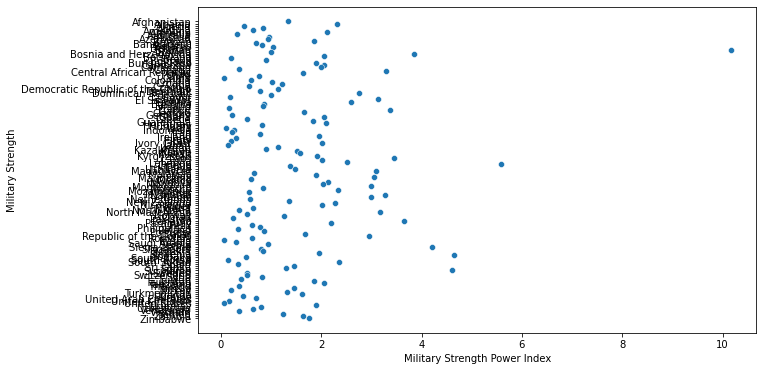

In [49]:
sns.scatterplot(x=df_numeric["Military Strength Power Index"],y=df_numeric["Military Strength"],data= df_numeric)

# Modelling

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()

In [51]:
X = df_numeric.drop(["Military Strength Power Index","Military Strength"], axis=1) # "Military Strength Power Index","Military Strength" düştük.
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.10465985, -0.35542142, -0.00807845, ..., -0.28040649,
        -0.13203321, -0.1108734 ],
       [-0.30099225, -0.35542142, -0.2735132 , ..., -0.27645539,
        -0.28412667, -0.30468338],
       [ 0.13240542,  0.09340232, -0.03993062, ...,  0.00600721,
        -0.05583959, -0.0700451 ],
       ...,
       [-0.17879366, -0.01989299, -0.2735132 , ..., -0.20997689,
        -0.16836947, -0.14900859],
       [-0.22848776, -0.2769862 , -0.2735132 , ..., -0.28040649,
        -0.22893125, -0.22330301],
       [-0.24315159, -0.3118463 , -0.2735132 , ..., -0.28040649,
        -0.23585307, -0.23798124]])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [52]:
#!pip install pyclustertend

In [53]:
from pyclustertend import hopkins

In [54]:
hopkins(X_scaled, X_scaled.shape[0]) # 0.5 ten küçük olduğu için Clustering yapılabilirç


0.07282965903084868

## Clustering with K-means

In [55]:
K_means_model = KMeans(n_clusters=5, random_state=42)


In [56]:
K_means_model.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 4, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1])

In [57]:
Class = K_means_model.labels_

In [58]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [59]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

### Model Building and label visualisation

Text(0.5, 1.0, 'elbow method')

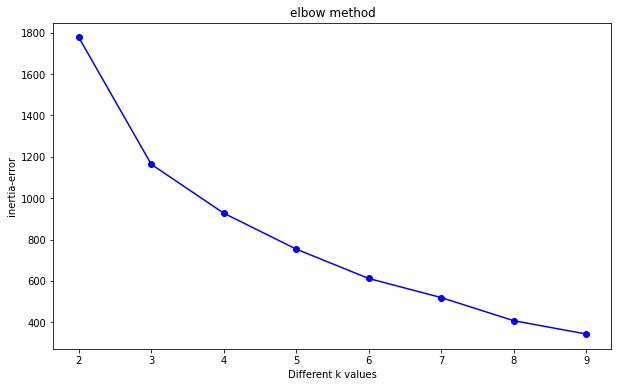

In [60]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [61]:
ssd

[1776.4357210000815,
 1163.5033913519978,
 927.2501992644126,
 753.7549974431331,
 611.8005656176216,
 519.6180146393959,
 407.9401853619112,
 343.62191754587064]

In [62]:
pd.Series(ssd).diff()

0           NaN
1   -612.932330
2   -236.253192
3   -173.495202
4   -141.954432
5    -92.182551
6   -111.677829
7    -64.318268
dtype: float64

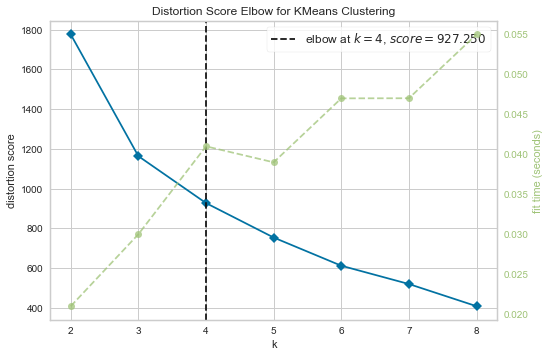

In [63]:

from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Evaluate 

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(X_scaled, K_means_model.labels_)

0.593711154176898

In [66]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8770522748638793
For n_clusters=3, the silhouette score is 0.8371800113568899
For n_clusters=4, the silhouette score is 0.6647785511750396
For n_clusters=5, the silhouette score is 0.593711154176898
For n_clusters=6, the silhouette score is 0.538241991208979
For n_clusters=7, the silhouette score is 0.5173586896333924
For n_clusters=8, the silhouette score is 0.5342094119286487


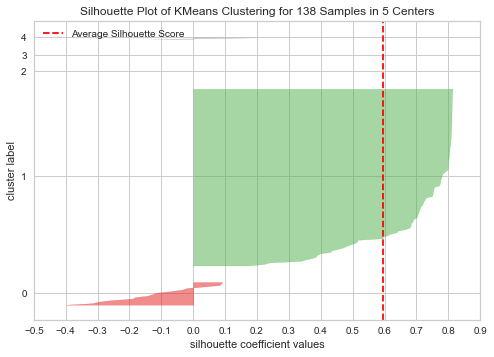

In [67]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

## Hierarchical Clustering

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

### Dendogram

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Model Building and label visualisation

In [70]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

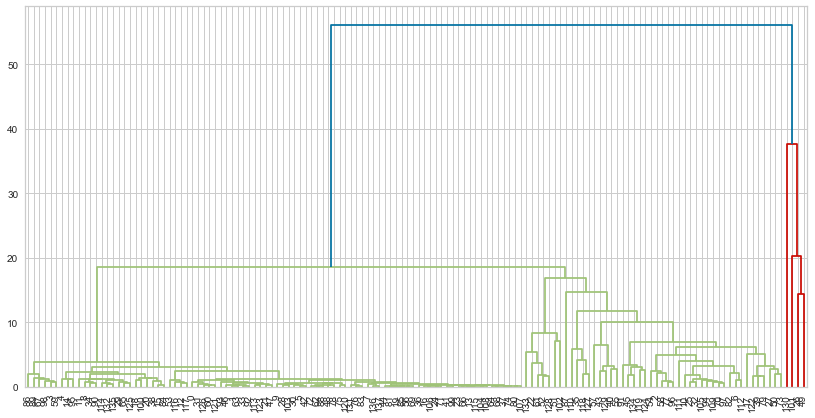

In [71]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

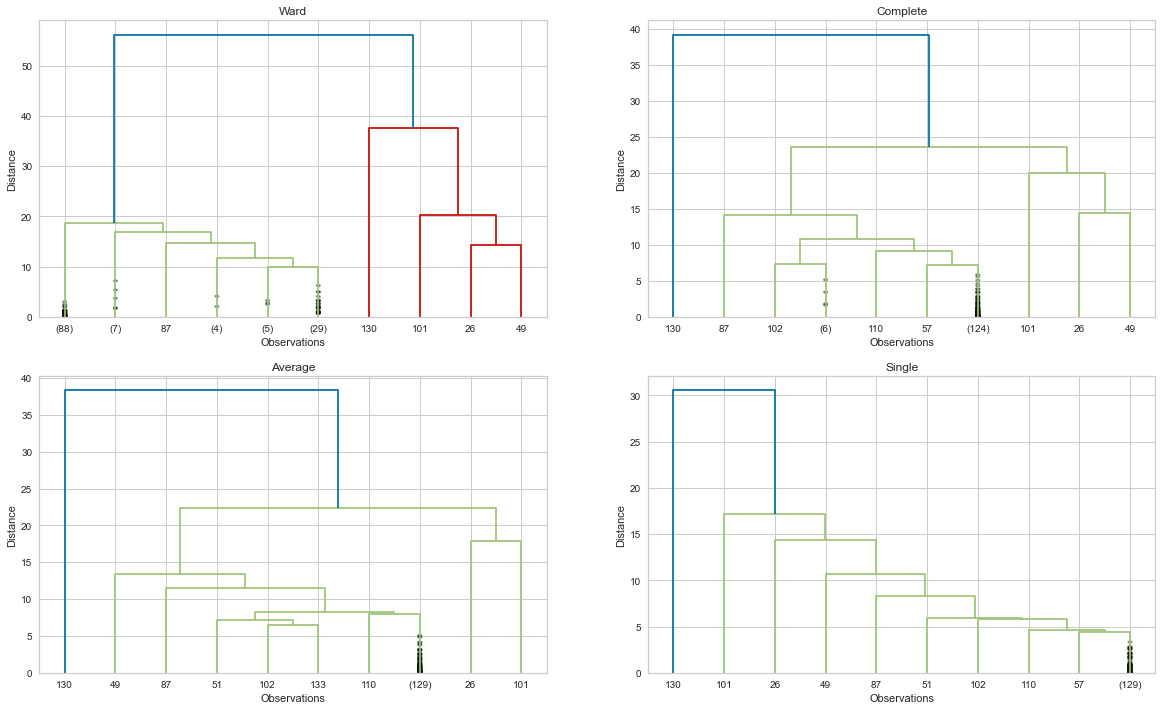

In [72]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Evaluate 

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.8611865865675974
Silhouette Score for 3 clusters: 0.8371800113568899
Silhouette Score for 4 clusters: 0.8272212054530496
Silhouette Score for 5 clusters: 0.42317208382896243
Silhouette Score for 6 clusters: 0.4374550502338108
Silhouette Score for 7 clusters: 0.437483673254119
Silhouette Score for 8 clusters: 0.4369445076831308
Silhouette Score for 9 clusters: 0.4382603553978201
Silhouette Score for 10 clusters: 0.4310280327024939


In [86]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X_scaled)

In [88]:
df_numeric["cluster"] = model.labels_


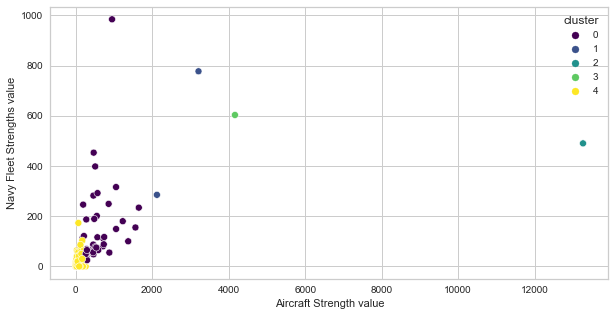

In [90]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_numeric["Aircraft Strength value"], 
                df_numeric["Navy Fleet Strengths value"], hue= df_numeric.cluster,palette= "viridis");

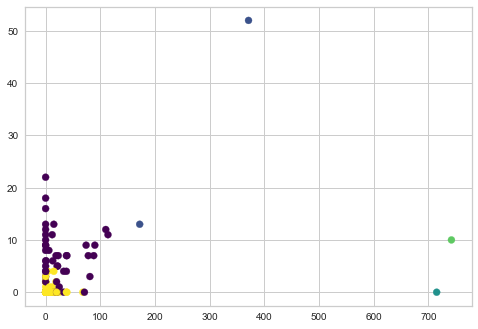

In [87]:
plt.scatter(df_numeric["Attack Aircraft Strength value"], df_numeric['Frigate Fleet Strength value'], c = clusters, cmap = "viridis")

In [77]:
df_numeric.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Military Strength'],
      dtype='object')

In [ ]:

maping = {0 : "low_military_power",
          1 : "medium_military_power",
          2 : "developing_military_power",
          3 :  "high_military_power",
          4 : "advanced_military_power "   }

In [92]:
df_numeric[df_numeric["cluster"]==0] # "low_military_power",

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Military Strength,cluster
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,Algeria,0
6,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,2.630000e+10,1.714000e+12,480.0,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,Australia,0
10,0.7066,177.0,44.0,0.0,11.0,57.0,67.0,0.0,276.0,1230.0,18.0,419.0,72.0,112.0,0.0,2.0,0.0,8.0,3.800000e+09,5.026000e+10,18.0,3666.0,112000.0,2.800000e+07,78913289.0,159453001.0,Bangladesh,0
17,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,1820.0,132.0,565.0,84.0,112.0,0.0,6.0,0.0,7.0,2.780000e+10,5.474000e+11,4093.0,2622000.0,3020000.0,1.300000e+10,107764996.0,208846892.0,Brazil,0
22,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,0.0,133.0,0.0,64.0,0.0,4.0,0.0,12.0,2.250000e+10,1.608000e+12,1467.0,3977000.0,2500000.0,1.697000e+11,16110865.0,35881659.0,Canada,0
25,0.7668,282.0,44.0,0.0,30.0,93.0,92.0,0.0,300.0,1430.0,48.0,158.0,10.0,69.0,0.0,4.0,0.0,10.0,4.250000e+09,1.834000e+11,481.0,3244.0,325000.0,1.500000e+08,8657902.0,17925262.0,Chile,0
27,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,595.0,6.0,110.0,0.0,453.0,0.0,11.0,0.0,4.0,1.060000e+10,1.246000e+11,836.0,853600.0,300000.0,2.002000e+09,24084498.0,48168996.0,Colombia,0
32,0.7878,113.0,33.0,0.0,4.0,38.0,35.0,0.0,57.0,972.0,22.0,0.0,0.0,74.0,0.0,0.0,0.0,9.0,4.760000e+09,4.848000e+11,80.0,137100.0,162000.0,4.906000e+08,2590457.0,5809502.0,Denmark,0
35,0.1872,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,11700.0,1139.0,2189.0,1084.0,316.0,2.0,8.0,0.0,7.0,1.120000e+10,7.747000e+10,83.0,589400.0,832000.0,4.400000e+09,42946553.0,99413317.0,Egypt,0
39,0.8498,194.0,55.0,0.0,11.0,105.0,127.0,0.0,200.0,2050.0,100.0,627.0,75.0,246.0,0.0,0.0,0.0,0.0,3.570000e+09,1.506000e+11,148.0,0.0,205000.0,0.000000e+00,2307420.0,5537364.0,Finland,0


In [93]:
df_numeric[df_numeric["cluster"]==1] # 2 : "developing_military_power",

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Military Strength,cluster
26,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,33000.0,3800.0,3600.0,2650.0,777.0,2.0,74.0,36.0,52.0,2.370000e+11,1.598000e+12,507.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,China,1
49,0.0953,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,8686.0,235.0,4060.0,266.0,285.0,1.0,16.0,10.0,13.0,6.100000e+10,5.016000e+11,346.0,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,India,1


In [94]:
df_numeric[df_numeric["cluster"]==2] #4 : "advanced_military_power " 

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Military Strength,cluster
130,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,1465.0,2740.0,1366.0,490.0,20.0,66.0,91.0,0.0,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,United States,2


In [96]:
df_numeric[df_numeric["cluster"]==3] #    3 :  "high_military_power",

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Military Strength,cluster
101,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,27038.0,6083.0,4465.0,3860.0,603.0,1.0,62.0,16.0,10.0,4.800000e+10,5.396000e+11,1218.0,10580000.0,3225000.0,8.000000e+10,69640160.0,142122776.0,Russia,3


In [97]:
df_numeric[df_numeric["cluster"]==4] #    1 : "medium_military_power",

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Military Strength,cluster
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,Afghanistan,4
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,Albania,4
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,Angola,4
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,Argentina,4
5,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,Armenia,4
7,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.380000e+09,6.308000e+11,52.0,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,Austria,4
8,0.9463,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2.805000e+09,1.741000e+10,37.0,789300.0,180000.0,7.000000e+09,5042346.0,10046516.0,Azerbaijan,4
9,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,1.415000e+09,5.215000e+10,4.0,45000.0,55000.0,1.246000e+08,806505.0,1422659.0,Bahrain,4
11,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,0.0,0.0,0.0,0.0,6.237028e+08,3.992000e+10,65.0,32000.0,190000.0,1.980000e+08,4982905.0,9527543.0,Belarus,4
12,1.0499,148.0,43.0,0.0,12.0,64.0,29.0,0.0,0.0,984.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,2.0,4.921000e+09,1.281000e+12,41.0,0.0,645000.0,0.000000e+00,4833107.0,11570762.0,Belgium,4
